### Imports

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Recogida Datos

In [68]:
### Esta informacion se dejo de actualizar en 2018
videojuegos=pd.read_csv('./data/ventas_videojuegos.csv')        ### Los juegos mas vendidos en japon son el genero bla bla, los mas vendidos en NA(norte america) son del genero bla bla
                                                                ### link de descarga: https://www.kaggle.com/datasets/migeruj/videogames-predictive-model

Para los videojuegos solo voy a tener en cuenta aquellos que superaron el millon en ventas en todo el mundo

In [69]:
###datos "Sales" estan en millones

### Eliminamos las filas donde no hay datos de ventas globales
videojuegos_pagados= videojuegos[videojuegos.Global_Sales != ""] 

###Formateamos la cantidad para que se separen los decimales por puntos
videojuegos_pagados.Global_Sales= [i.replace(",",".") for i in videojuegos_pagados.Global_Sales]

###Convertimos la cantidad en float y la transformamos a millones
videojuegos_pagados.Global_Sales= [float(i)*10e6 for i in videojuegos_pagados.Global_Sales]

###Mantenemos solo los que han obtenido mas de 1_000_000 en ventas
videojuegos_pagados[videojuegos_pagados.Global_Sales >1_000_000]

###Dos celdas de codigo mas abajo se hace lo mismo en JP_Sales en una sola linea

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45",825400000.0,E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29",355700000.0,E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95",327800000.0,E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88",298100000.0,E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84",289200000.0,E,Malo
...,...,...,...,...,...,...,...,...,...,...
5382,PS3,Fighting,Konami Digital Entertainment,"0,1",0,0,"0,01",1100000.0,T,Malo
5383,X,Shooter,Electronic Arts,"0,08","0,02",0,0,1100000.0,M,Malo
5384,X360,Adventure,Namco Bandai Games,"0,05","0,04",0,"0,01",1100000.0,E10+,Aceptable
5385,DS,Simulation,Atlus,"0,1",0,0,"0,01",1100000.0,T,Bueno


In [70]:
'''print("PLatform",videojuegos_pagados.Platform.describe(),end='\n\n')
print("Genre",videojuegos_pagados.Genre.describe(),end='\n\n')
print("Publisher",videojuegos_pagados.Publisher.describe(),end='\n\n')
print("NA_Sales",videojuegos_pagados.NA_Sales.describe(),end='\n\n')
print("EU",videojuegos_pagados.EU_Sales.describe(),end='\n\n')
print("JP",videojuegos_pagados.JP_Sales.describe(),end='\n\n')
print("Other_Sales",videojuegos_pagados.Other_Sales.describe(),end='\n\n')
print("GLobal_Sales",videojuegos_pagados.Global_Sales.describe(),end='\n\n')
print("Rating",videojuegos_pagados.Rating.describe(),end='\n\n')
print("Critics",videojuegos_pagados.Critic_Score_Class.describe(),end='\n\n')

'''

'print("PLatform",videojuegos_pagados.Platform.describe(),end=\'\n\n\')\nprint("Genre",videojuegos_pagados.Genre.describe(),end=\'\n\n\')\nprint("Publisher",videojuegos_pagados.Publisher.describe(),end=\'\n\n\')\nprint("NA_Sales",videojuegos_pagados.NA_Sales.describe(),end=\'\n\n\')\nprint("EU",videojuegos_pagados.EU_Sales.describe(),end=\'\n\n\')\nprint("JP",videojuegos_pagados.JP_Sales.describe(),end=\'\n\n\')\nprint("Other_Sales",videojuegos_pagados.Other_Sales.describe(),end=\'\n\n\')\nprint("GLobal_Sales",videojuegos_pagados.Global_Sales.describe(),end=\'\n\n\')\nprint("Rating",videojuegos_pagados.Rating.describe(),end=\'\n\n\')\nprint("Critics",videojuegos_pagados.Critic_Score_Class.describe(),end=\'\n\n\')\n\n'

#### Limpieza y formateo JP_Sales, NA_Sales, EU_Sales

In [71]:
videojuegos_pagados= videojuegos_pagados[videojuegos_pagados.JP_Sales != ""]
videojuegos_pagados.JP_Sales= [(float(i.replace(',','.')))*10e6 for i in videojuegos_pagados.JP_Sales]


videojuegos_pagados= videojuegos_pagados[videojuegos_pagados.NA_Sales != ""]
videojuegos_pagados.NA_Sales= [(float(i.replace(',','.')))*10e6 for i in videojuegos_pagados.NA_Sales]

videojuegos_pagados= videojuegos_pagados[videojuegos_pagados.EU_Sales != ""]
videojuegos_pagados.EU_Sales= [(float(i.replace(',','.')))*10e6 for i in videojuegos_pagados.EU_Sales]


In [72]:
###Obtencio valores unicos de columna 'Critic_Score_Class'
videojuegos_pagados.Critic_Score_Class.unique()

array(['Bueno', 'Excelente', 'Malo', 'Aceptable'], dtype=object)

In [73]:
###Formateo columna/valor Critic_Score_Class
videojuegos_pagados= videojuegos_pagados[videojuegos_pagados.Critic_Score_Class != ""]

videojuegos_pagados.Critic_Score_Class= videojuegos_pagados.Critic_Score_Class.map({
                                                                                    'Bueno':6,
                                                                                    'Aceptable':4,
                                                                                    'Excelente':10,
                                                                                    'Malo':0
                                                                                        },
                                                                                        na_action=None)


<AxesSubplot:>

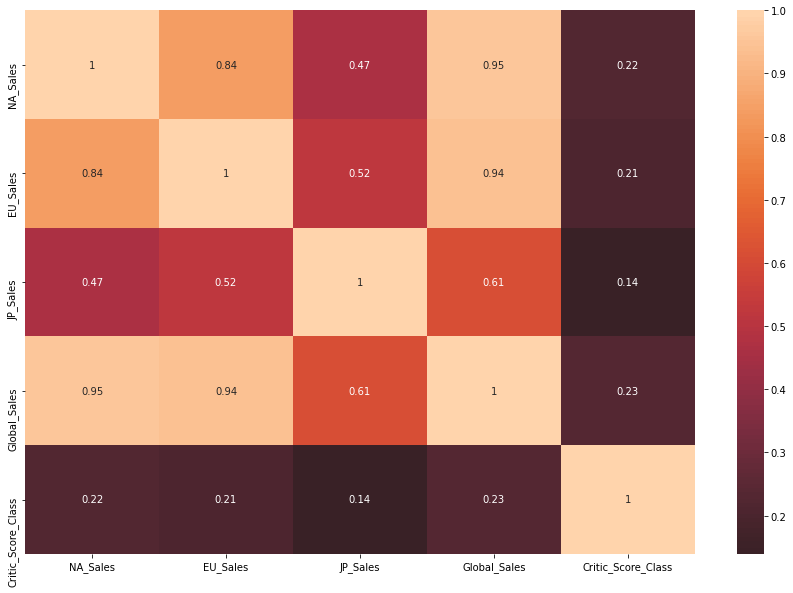

In [74]:
##Dibujo de un mapa de calor buscando alguna correlacion evidente

correlacion= videojuegos_pagados.iloc[::].corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlacion, center=0,annot=True)

## De la observacion de abajo obtenemos

#### 1-A mas se venda en JP no indica mayor venta en ningun otro lugar, ni de manera global. Podriamos considerar, prematuramente, que los videojuegos japoneses en general son mas de nicho

#### 2-Las ventas de NA y EU estan relacionadas, suelen ser proporcionales

#### 3-A mas ventas en EU y NA mas ventas globales, puede ser territorial o que estos juegos no son tan nicho y son mas de gusto general/global

Text(0.5, 1.0, 'NA y JP')

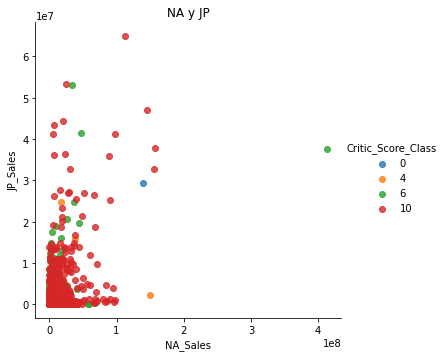

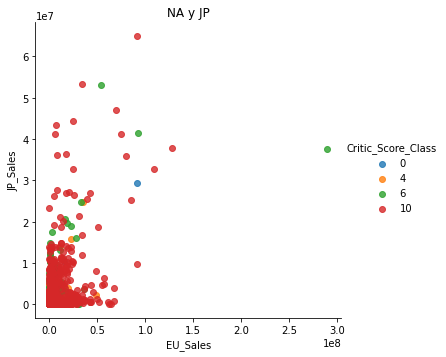

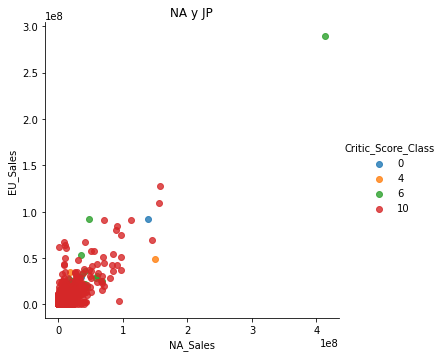

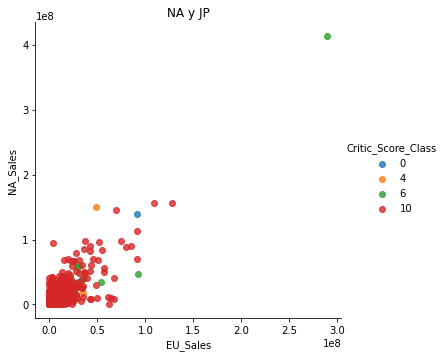

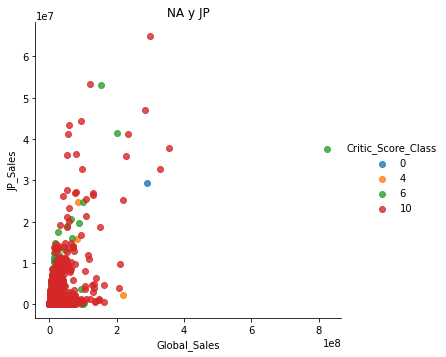

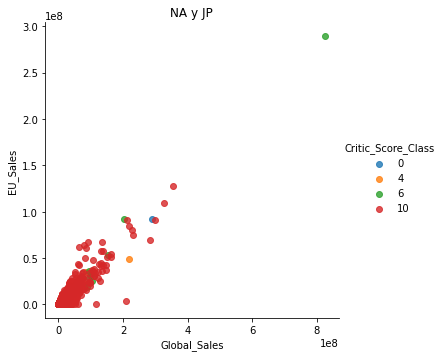

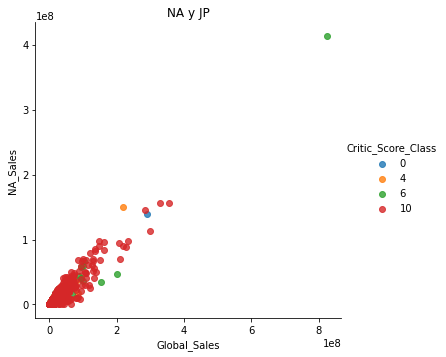

In [75]:
###Veremos distintas relaciones

####Ventas NA y JP

sns.lmplot(x = "NA_Sales", y = "JP_Sales", data = videojuegos_pagados, fit_reg = False, hue = "Critic_Score_Class")
plt.title('NA y JP')


sns.lmplot(x = "EU_Sales", y = "JP_Sales", data = videojuegos_pagados, fit_reg = False, hue = "Critic_Score_Class")
plt.title('NA y JP')


sns.lmplot(x = "NA_Sales", y = "EU_Sales", data = videojuegos_pagados, fit_reg = False, hue = "Critic_Score_Class")
plt.title('NA y JP')


sns.lmplot(x = "EU_Sales", y = "NA_Sales", data = videojuegos_pagados, fit_reg = False, hue = "Critic_Score_Class")
plt.title('NA y JP')


sns.lmplot(x = "Global_Sales", y = "JP_Sales", data = videojuegos_pagados, fit_reg = False, hue = "Critic_Score_Class")
plt.title('NA y JP')


sns.lmplot(x = "Global_Sales", y = "EU_Sales", data = videojuegos_pagados, fit_reg = False, hue = "Critic_Score_Class")
plt.title('NA y JP')


sns.lmplot(x = "Global_Sales", y = "NA_Sales", data = videojuegos_pagados, fit_reg = False, hue = "Critic_Score_Class");
plt.title('NA y JP')



# Generos de videojuego por region

### Se necesita agrupar los datos por categorias

In [76]:
###Elimino las columnas ajenas a esta representacion y no cuantitativas para evitar problemas al agrupar
videojuegos_ventas_GJ=videojuegos_pagados.drop(['Platform','Publisher','Rating','Critic_Score_Class'],axis=1)
videojuegos_ventas_GJ=videojuegos_ventas_GJ.groupby('Genre').sum()
videojuegos_ventas_GJ



,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Genre,,,,
Action,6.093400e+09,4.006400e+09,7.752000e+08,1.239480e+10
Adventure,3.941000e+08,2.541000e+08,8.770000e+07,8.188000e+08
Fighting,1.388200e+09,6.153000e+08,2.805000e+08,2.539100e+09
Misc,2.287200e+09,1.228200e+09,3.327000e+08,4.267300e+09
Platform,1.968000e+09,1.099600e+09,4.362000e+08,3.832100e+09
Puzzle,3.411000e+08,2.415000e+08,1.515000e+08,7.987000e+08
Racing,2.282500e+09,1.671900e+09,2.782000e+08,4.822600e+09
Role-Playing,2.229600e+09,1.222000e+09,1.253100e+09,5.118100e+09
Shooter,4.623500e+09,2.689200e+09,1.885000e+08,8.408400e+09


### Eliminamos la fila 'Action', ya que considero que es una hipercategoria que engloba otras ya mostradas

In [77]:
videojuegos_ventas_GJ.drop(videojuegos_ventas_GJ.index[[0]], inplace=True)
videojuegos_ventas_GJ

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Genre,,,,
Adventure,3.941000e+08,2.541000e+08,8.770000e+07,8.188000e+08
Fighting,1.388200e+09,6.153000e+08,2.805000e+08,2.539100e+09
Misc,2.287200e+09,1.228200e+09,3.327000e+08,4.267300e+09
Platform,1.968000e+09,1.099600e+09,4.362000e+08,3.832100e+09
Puzzle,3.411000e+08,2.415000e+08,1.515000e+08,7.987000e+08
Racing,2.282500e+09,1.671900e+09,2.782000e+08,4.822600e+09
Role-Playing,2.229600e+09,1.222000e+09,1.253100e+09,5.118100e+09
Shooter,4.623500e+09,2.689200e+09,1.885000e+08,8.408400e+09
Simulation,9.436000e+08,7.073000e+08,2.817000e+08,2.108800e+09


### Primer histograma relacion genero-ventasglobales y genero-ventas Japon

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


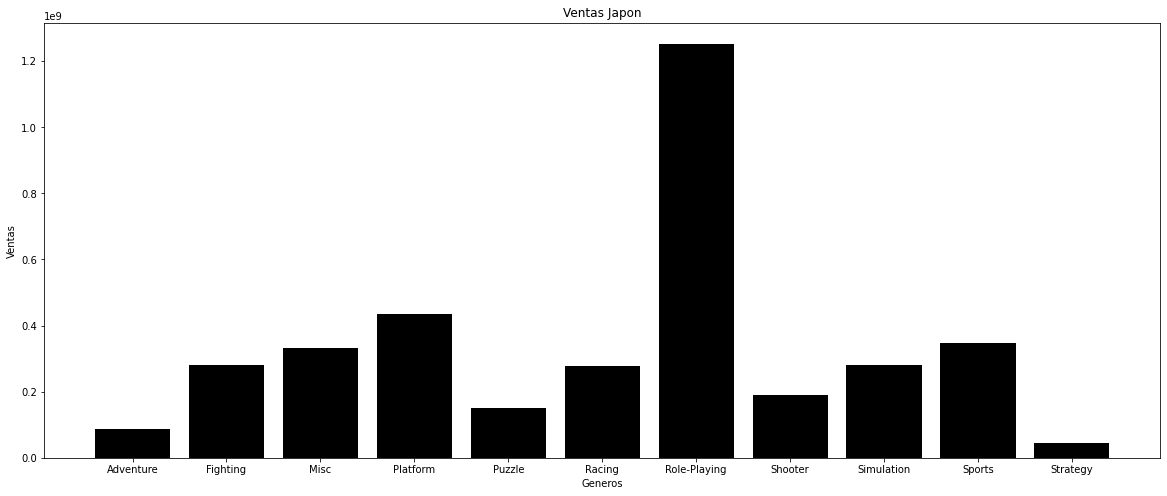

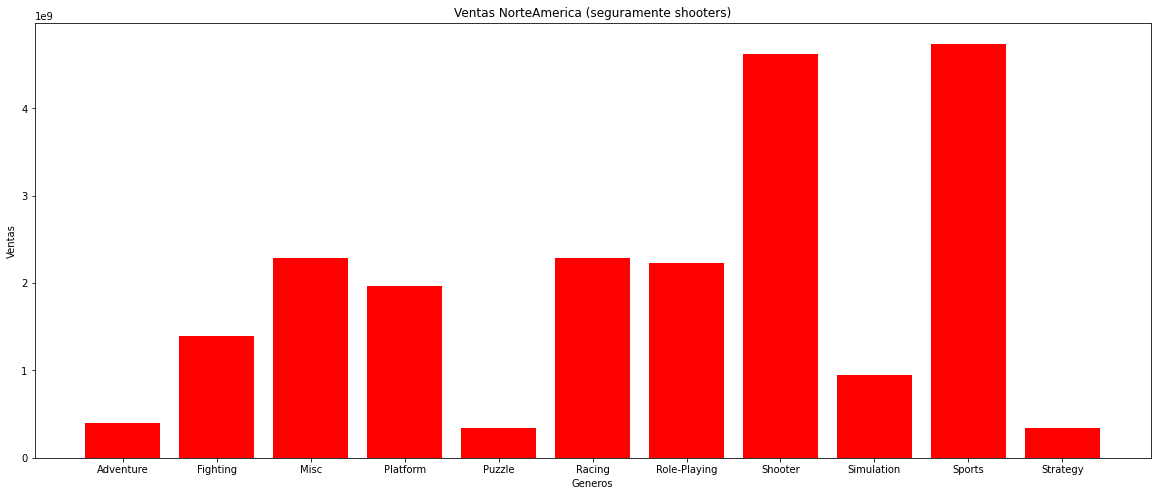

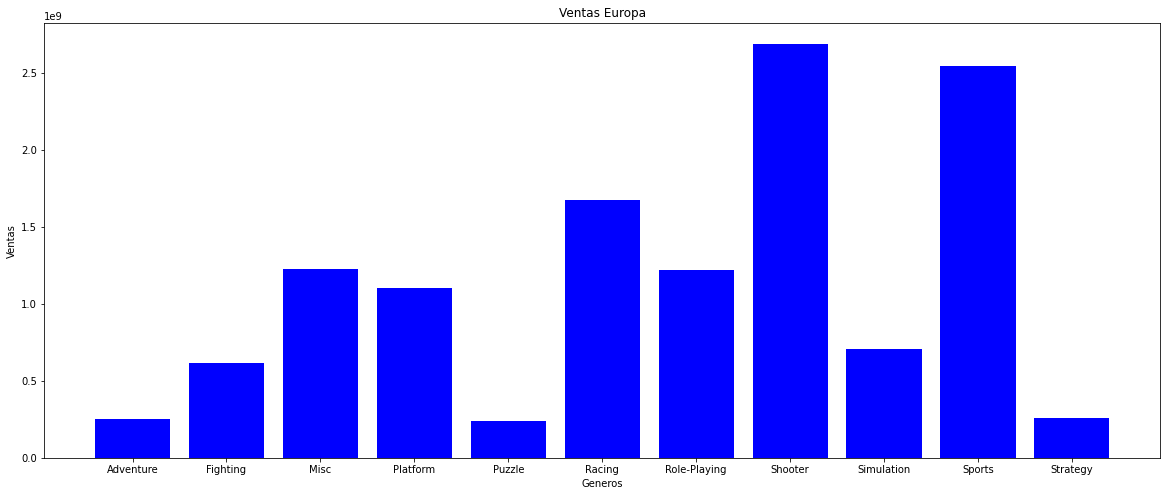

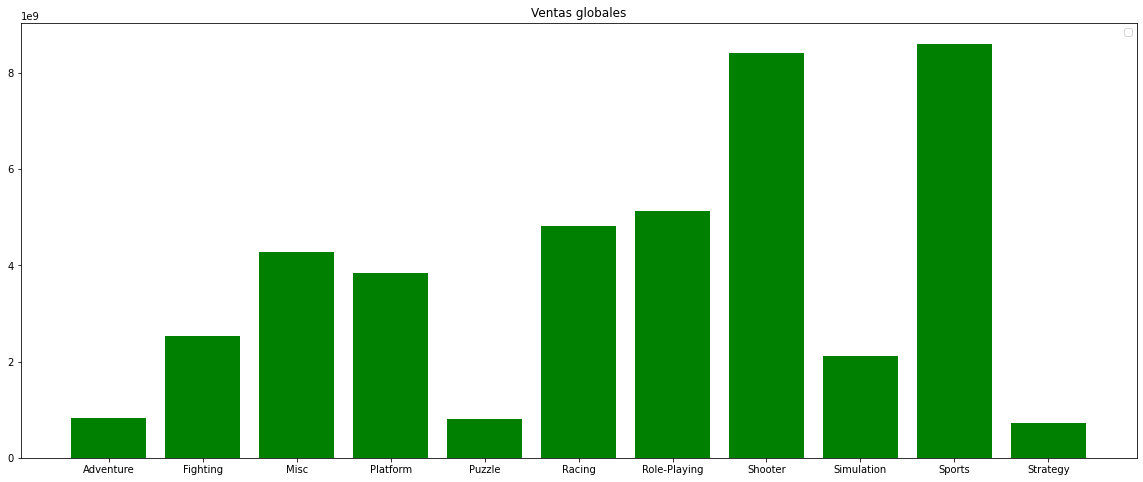

In [78]:
###Creamos una figura con pyplot
plt.figure(figsize=(20,8))
"""
###Dibujamos el primer histograma con las ventas globales
sns.distplot(videojuegos_ventas_GJ['Global_Sales'], color='skyblue', label='Ventas Globales',ax=axes[0,0])

###Dibujamos el segundo histograma con las ventas en japon
sns.distplot(videojuegos_ventas_GJ['JP_Sales'], color='red', label='Ventas en Japon')
"""
plt.title('Ventas Japon')
plt.xlabel("Generos")
plt.ylabel("Ventas")
plt.bar(x=videojuegos_ventas_GJ.index, height=videojuegos_ventas_GJ.JP_Sales,color='black')

plt.figure(figsize=(20,8))
plt.title('Ventas NorteAmerica (seguramente shooters)')
plt.xlabel("Generos")
plt.ylabel("Ventas")
plt.bar(x=videojuegos_ventas_GJ.index, height=videojuegos_ventas_GJ.NA_Sales,color='red')

plt.figure(figsize=(20,8))
plt.title('Ventas Europa')
plt.xlabel("Generos")
plt.ylabel("Ventas")
plt.bar(x=videojuegos_ventas_GJ.index, height=videojuegos_ventas_GJ.EU_Sales,color='blue')

plt.figure(figsize=(20,8))
plt.title("Ventas globales")
plt.bar(x=videojuegos_ventas_GJ.index, height=videojuegos_ventas_GJ.Global_Sales,color='green')

plt.legend()

### Se comprueba que los juegos mas vendidos en Japon son los juegos Role-Play hasta 2018
### Se comprueba que en NA y EU los generos mas vendidos, casi a la par, son shooter y deportes

# Plataforma con mas ventas segun los annnos

### Esta parte esta con otro dataset que contaba con annos de salida al mercado

In [79]:
videojuegos=pd.read_csv('./data/vgsales.csv') 

In [80]:
videojuegos[videojuegos.Year == 1990].head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
215,216,Dr. Mario,NES,1990.0,Puzzle,Nintendo,2.62,0.60,1.52,0.10,4.85
391,392,F-1 Race,GB,1990.0,Racing,Nintendo,1.73,0.69,0.59,0.40,3.41
446,447,Dragon Warrior IV,NES,1990.0,Role-Playing,Enix Corporation,0.08,0.00,3.03,0.01,3.12
509,510,F-Zero,SNES,1990.0,Racing,Nintendo,1.37,0.51,0.89,0.07,2.85
588,589,Streets of Rage,GEN,1990.0,Action,Sega,1.86,0.55,0.11,0.08,2.60
722,724,Teenage Mutant Ninja Turtles II: The Arcade Game,NES,1990.0,Action,Konami Digital Entertainment,1.74,0.25,0.21,0.03,2.23
1190,1192,Final Fight,SNES,1990.0,Action,Capcom,0.67,0.17,0.69,0.03,1.56
1278,1280,Nintendo World Cup,NES,1990.0,Sports,Nintendo,0.28,0.50,0.65,0.05,1.48
1385,1387,Final Fantasy III,NES,1990.0,Role-Playing,SquareSoft,0.00,0.00,1.39,0.01,1.40


### Formateamos datos de ventas a millones

Falta eliminar datos vacios

In [81]:

videojuegos_pagados= videojuegos[videojuegos.Global_Sales != ""] 


videojuegos_pagados.Global_Sales= [float(i)*10e6 for i in videojuegos_pagados.Global_Sales]


videojuegos_pagados[videojuegos_pagados.Global_Sales >1_000_000]


videojuegos_pagados= videojuegos_pagados[videojuegos_pagados.JP_Sales != ""]
videojuegos_pagados.JP_Sales= [(float(i))*10e6 for i in videojuegos_pagados.JP_Sales]


videojuegos_pagados= videojuegos_pagados[videojuegos_pagados.NA_Sales != ""]
videojuegos_pagados.NA_Sales= [(float(i))*10e6 for i in videojuegos_pagados.NA_Sales]

videojuegos_pagados= videojuegos_pagados[videojuegos_pagados.EU_Sales != ""]
videojuegos_pagados.EU_Sales= [(float(i))*10e6 for i in videojuegos_pagados.EU_Sales]


#### Agrupamos datos segun plataforma y anno

In [82]:
videojuegos_ventas_GJ=videojuegos_pagados.drop(['Genre','Publisher','Rank','Name'],axis=1)
videojuegos_ventas_GJ=videojuegos_ventas_GJ.groupby(['Platform','Year']).sum()
videojuegos_ventas_GJ=videojuegos_ventas_GJ#.unstack()

In [83]:
videojuegos_ventas_GJ.info


<bound method DataFrame.info of                     NA_Sales     EU_Sales   JP_Sales  Other_Sales  \
Platform Year                                                       
2600     1980.0  105900000.0    6700000.0        0.0         0.12   
         1981.0  334000000.0   19600000.0        0.0         0.32   
         1982.0  269200000.0   16500000.0        0.0         0.31   
         1983.0   54400000.0    3400000.0        0.0         0.06   
         1984.0    2600000.0     100000.0        0.0         0.00   
...                      ...          ...        ...          ...   
XB       2008.0    1300000.0     400000.0        0.0         0.01   
XOne     2013.0  118000000.0   52900000.0   200000.0         1.50   
         2014.0  304100000.0  177500000.0  1400000.0         4.14   
         2015.0  342900000.0  179800000.0  1700000.0         5.23   
         2016.0   66900000.0   46300000.0   100000.0         1.05   

                 Global_Sales  
Platform Year                  
2600  

#### Rellenamos todos los Nan con 0

In [84]:
videojuegos_ventas_GJ.fillna(0, inplace=True)
videojuegos_ventas_GJ.info

<bound method DataFrame.info of                     NA_Sales     EU_Sales   JP_Sales  Other_Sales  \
Platform Year                                                       
2600     1980.0  105900000.0    6700000.0        0.0         0.12   
         1981.0  334000000.0   19600000.0        0.0         0.32   
         1982.0  269200000.0   16500000.0        0.0         0.31   
         1983.0   54400000.0    3400000.0        0.0         0.06   
         1984.0    2600000.0     100000.0        0.0         0.00   
...                      ...          ...        ...          ...   
XB       2008.0    1300000.0     400000.0        0.0         0.01   
XOne     2013.0  118000000.0   52900000.0   200000.0         1.50   
         2014.0  304100000.0  177500000.0  1400000.0         4.14   
         2015.0  342900000.0  179800000.0  1700000.0         5.23   
         2016.0   66900000.0   46300000.0   100000.0         1.05   

                 Global_Sales  
Platform Year                  
2600  

In [85]:
videojuegos_ventas_GJ.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,2.410000e+02,2.410000e+02,2.410000e+02,241.000000,2.410000e+02
mean,1.798104e+08,9.996349e+07,5.329046e+07,3.273900,3.659900e+08
std,2.517385e+08,1.479715e+08,7.444783e+07,5.846089,4.870884e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000e+05
25%,8.200000e+06,4.200000e+06,4.000000e+05,0.080000,3.290000e+07
50%,6.390000e+07,3.480000e+07,1.950000e+07,0.630000,1.474000e+08
75%,2.698000e+08,1.178000e+08,8.100000e+07,3.050000,5.009000e+08
max,1.165400e+09,6.527000e+08,3.856000e+08,39.850000,2.117800e+09


In [86]:
videojuegos_ventas_GJ.head(10)

NA_Sales    EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Year                                                                
2600     1980.0  105900000.0   6700000.0       0.0         0.12   113800000.0
         1981.0  334000000.0  19600000.0       0.0         0.32   357700000.0
         1982.0  269200000.0  16500000.0       0.0         0.31   288600000.0
         1983.0   54400000.0   3400000.0       0.0         0.06    58300000.0
         1984.0    2600000.0    100000.0       0.0         0.00     2700000.0
         1985.0    4200000.0    300000.0       0.0         0.00     4500000.0
         1986.0    6300000.0    400000.0       0.0         0.00     6600000.0
         1987.0   18400000.0    900000.0       0.0         0.01    19800000.0
         1988.0    6900000.0    400000.0       0.0         0.01     7500000.0
         1989.0    5900000.0    300000.0       0.0         0.01     6200000.0

### Se necesita sumar a cada anno las ventas del anno anterior por plataforma

In [87]:

videojuegos_ventas_GJ.head(10)

NA_Sales    EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Year                                                                
2600     1980.0  105900000.0   6700000.0       0.0         0.12   113800000.0
         1981.0  334000000.0  19600000.0       0.0         0.32   357700000.0
         1982.0  269200000.0  16500000.0       0.0         0.31   288600000.0
         1983.0   54400000.0   3400000.0       0.0         0.06    58300000.0
         1984.0    2600000.0    100000.0       0.0         0.00     2700000.0
         1985.0    4200000.0    300000.0       0.0         0.00     4500000.0
         1986.0    6300000.0    400000.0       0.0         0.00     6600000.0
         1987.0   18400000.0    900000.0       0.0         0.01    19800000.0
         1988.0    6900000.0    400000.0       0.0         0.01     7500000.0
         1989.0    5900000.0    300000.0       0.0         0.01     6200000.0

In [88]:
videojuegos_ventas_GJ.index.__len__()

241

#### Sumamos las ventas de los annos anteriores al anno siguiente en ventas globales

In [89]:

for i in range(1,videojuegos_ventas_GJ.index.__len__()):
    
    videojuegos_ventas_GJ.iloc[i].Global_Sales+=videojuegos_ventas_GJ.iloc[i-1].Global_Sales
    
videojuegos_ventas_GJ.head(10)

NA_Sales    EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform Year                                                                
2600     1980.0  105900000.0   6700000.0       0.0         0.12   113800000.0
         1981.0  334000000.0  19600000.0       0.0         0.32   471500000.0
         1982.0  269200000.0  16500000.0       0.0         0.31   760100000.0
         1983.0   54400000.0   3400000.0       0.0         0.06   818400000.0
         1984.0    2600000.0    100000.0       0.0         0.00   821100000.0
         1985.0    4200000.0    300000.0       0.0         0.00   825600000.0
         1986.0    6300000.0    400000.0       0.0         0.00   832200000.0
         1987.0   18400000.0    900000.0       0.0         0.01   852000000.0
         1988.0    6900000.0    400000.0       0.0         0.01   859500000.0
         1989.0    5900000.0    300000.0       0.0         0.01   865700000.0

#### Lo exportamos a un csv

In [94]:
df=videojuegos_ventas_GJ.reset_index()
df[df.Year == 1990].head(50)

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
40,GB,1990.0,22400000.0,8900000.0,13300000.0,0.43,1.239180e+10
66,GEN,1990.0,18600000.0,5500000.0,1100000.0,0.08,1.935600e+10
86,NES,1990.0,60800000.0,15900000.0,78400000.0,0.22,2.418870e+10
187,SNES,1990.0,152800000.0,46000000.0,56000000.0,0.67,6.290460e+10


In [91]:
df


,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,1980.0,105900000.0,6700000.0,0.0,0.12,1.138000e+08
1,2600,1981.0,334000000.0,19600000.0,0.0,0.32,4.715000e+08
2,2600,1982.0,269200000.0,16500000.0,0.0,0.31,7.601000e+08
3,2600,1983.0,54400000.0,3400000.0,0.0,0.06,8.184000e+08
4,2600,1984.0,2600000.0,100000.0,0.0,0.00,8.211000e+08
...,...,...,...,...,...,...,...
236,XB,2008.0,1300000.0,400000.0,0.0,0.01,8.679300e+10
237,XOne,2013.0,118000000.0,52900000.0,200000.0,1.50,8.697900e+10
238,XOne,2014.0,304100000.0,177500000.0,1400000.0,4.14,8.750330e+10
239,XOne,2015.0,342900000.0,179800000.0,1700000.0,5.23,8.807990e+10


TypeError: 'value' must be an instance of str or bytes, not a tuple

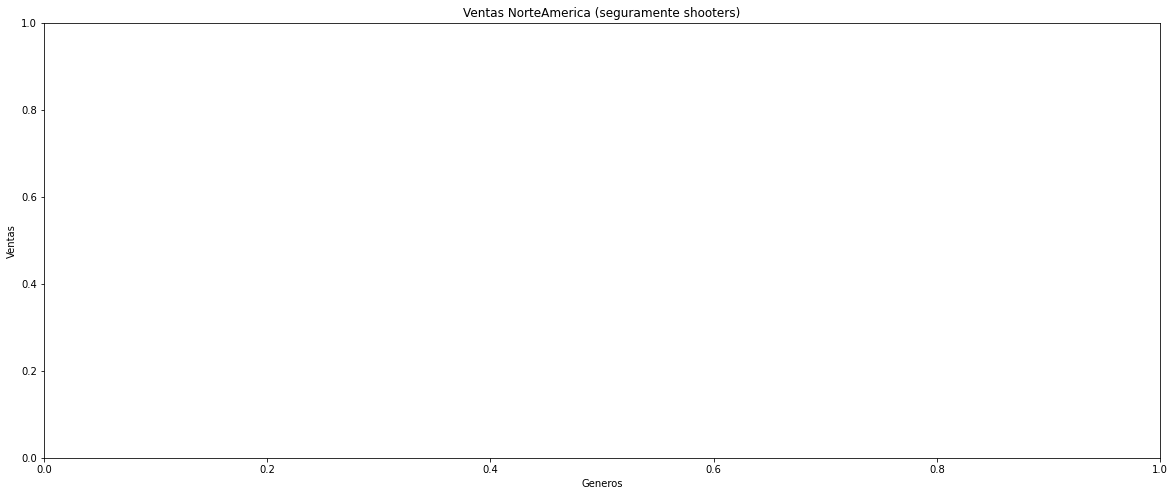

In [92]:


plt.figure(figsize=(20,8))
plt.title('Ventas NorteAmerica (seguramente shooters)')
plt.xlabel("Generos")
plt.ylabel("Ventas")
plt.bar(x=videojuegos_ventas_GJ.index, height=videojuegos_ventas_GJ.Global_Sales,color='red')